In [2]:
#!pip install install fastai

In [3]:
import os
files = os.listdir('/kaggle/input/test/pytorch/v1/1')
print(files)

['LikeItOrNot-v2.pkl']


In [4]:
from fastai.text.all import *


model_path = '/kaggle/input/test/pytorch/v1/1/LikeItOrNot-v2.pkl'
model = load_learner(model_path)


In [5]:
path = untar_data(URLs.AMAZON_REVIEWS_POLARITY)


In [6]:
print(path.ls())


[Path('/root/.fastai/data/amazon_review_polarity_csv/readme.txt'), Path('/root/.fastai/data/amazon_review_polarity_csv/train.csv'), Path('/root/.fastai/data/amazon_review_polarity_csv/test.csv')]


In [7]:
test_path = Path('/root/.fastai/data/amazon_review_polarity_csv/test.csv')
test_df = pd.read_csv(test_path)
test_df.columns = ['Review', 'Title', 'Description']
test_df['Text'] = test_df['Title'] + '.' + test_df['Description']
test_df = test_df.drop(["Title", "Description"], axis=1)
test_df['Text'] = test_df['Text'].fillna('').astype(str)

,Review,Text
0,2,"One of the best game music soundtracks - for a game I didn't really play.Despite the fact that I have only played a small portion of the game, the music I heard (plus the connection to Chrono Trigger which was great as well) led me to purchase the soundtrack, and it remains one of my favorite albums. There is an incredible mix of fun, epic, and emotional songs. Those sad and beautiful tracks I especially like, as there's not too many of those kinds of songs in my other video game soundtracks. I must admit that one of the songs (Life-A Distant Promise) has brought tears to my eyes on many o..."
1,1,"Batteries died within a year ....I bought this charger in Jul 2003 and it worked OK for a while. The design is nice and convenient. However, after about a year, the batteries would not hold a charge. Might as well just get alkaline disposables, or look elsewhere for a charger that comes with batteries that have better staying power."
2,2,"works fine, but Maha Energy is better.Check out Maha Energy's website. Their Powerex MH-C204F charger works in 100 minutes for rapid charge, with option for slower charge (better for batteries). And they have 2200 mAh batteries."


In [22]:
test_df.rename(columns={'Text': 'text'}, inplace=True)
len(test_df)

399999

In [49]:
test_df_sample = test_df.sample(n=1000, random_state=42)
test_df_sample.head()

,Review,text
242139,2,"Book Still Gets Five Stars but One for Frey.When I read this book a year ago, I found some aspects either ridiculous or too vague, and I assumed he exaggerated but accepted that as artistic license. I felt sorry for the guy and admired his strength to recover. Now America feels duped. He was a frat boy! He goes around making the Oprah scene and further embellishing on the details in his speaking appearances, and it looks like his parents are in on the joke. Enabling parents... drug user.... hmmm I see a pattern here. If only he had presented it as fiction. I give it five stars because it's..."
225458,2,"Entertaining....After reading some of the negative reviews, I feel I should add my two cents because I feel as if some of the readers are losing site of these books.As a former 8th grade English teacher who has read her fair share of teen fiction, I feel it's necessary to remind people that these are fantasy books, and they have been written for entertainment, about magical and/or mythical creatures! They are not non-fiction, literary fiction, or biographies. Rather, they are meant for pure enjoyment and for teens. Teens love melodramas and things that relate to their current world (ie. re..."
10463,1,Brakes easy.The plastic hindge at the top of the fold broke after about 3 months of use. The good sound quality is of no use if the item is broken!
384120,2,"Flamin'.I must say that I have only read 3 of Zane's writings (as a Zane newbie) and this is, indeed, my favorite. It's flamin' hot and the storyline is great. As I read the book I felt like I was there and could see it all happening so vividly. I read the book in, like, 3 days because I couldn't put it down. 100 pgs a day. Once you read this book you'll get hooked...well...once you read any of Zane's books you'll get hooked!!! I know I have."
169115,2,BALLET BEAUTIFUL.Great product! Easy to learn; makes you strong. If you concentrate and keep working at it-you'll be able to be proud of yourself.


In [50]:

# Create a test DataLoader from the test DataFrame sample
test_dl = model.dls.test_dl(test_df_sample, with_labels=True)

# Get predictions for the test set
preds, _ = model.get_preds(dl=test_dl)




In [51]:
## Convert predictions to the format suitable for adding to your DataFrame
predictions = preds.argmax(dim=1)

# Assign the predictions back to your sampled test DataFrame
test_df_sample['Predictions'] = predictions+1


In [52]:
test_df_sample.head()

,Review,text,Predictions
242139,2,"Book Still Gets Five Stars but One for Frey.When I read this book a year ago, I found some aspects either ridiculous or too vague, and I assumed he exaggerated but accepted that as artistic license. I felt sorry for the guy and admired his strength to recover. Now America feels duped. He was a frat boy! He goes around making the Oprah scene and further embellishing on the details in his speaking appearances, and it looks like his parents are in on the joke. Enabling parents... drug user.... hmmm I see a pattern here. If only he had presented it as fiction. I give it five stars because it's...",1
225458,2,"Entertaining....After reading some of the negative reviews, I feel I should add my two cents because I feel as if some of the readers are losing site of these books.As a former 8th grade English teacher who has read her fair share of teen fiction, I feel it's necessary to remind people that these are fantasy books, and they have been written for entertainment, about magical and/or mythical creatures! They are not non-fiction, literary fiction, or biographies. Rather, they are meant for pure enjoyment and for teens. Teens love melodramas and things that relate to their current world (ie. re...",2
10463,1,Brakes easy.The plastic hindge at the top of the fold broke after about 3 months of use. The good sound quality is of no use if the item is broken!,1
384120,2,"Flamin'.I must say that I have only read 3 of Zane's writings (as a Zane newbie) and this is, indeed, my favorite. It's flamin' hot and the storyline is great. As I read the book I felt like I was there and could see it all happening so vividly. I read the book in, like, 3 days because I couldn't put it down. 100 pgs a day. Once you read this book you'll get hooked...well...once you read any of Zane's books you'll get hooked!!! I know I have.",2
169115,2,BALLET BEAUTIFUL.Great product! Easy to learn; makes you strong. If you concentrate and keep working at it-you'll be able to be proud of yourself.,2


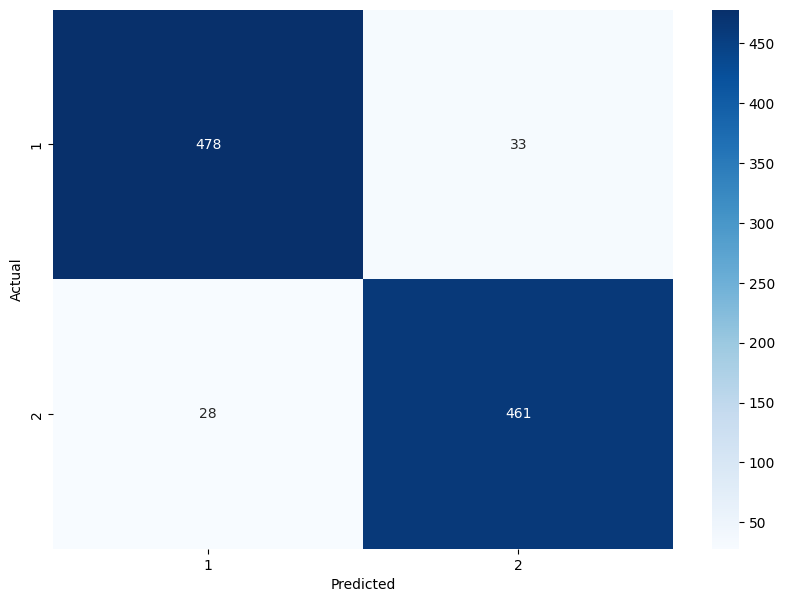

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your actual labels and predictions are already loaded into actuals and predictions
actuals = test_df_sample['Review'].values
predictions = test_df_sample['Predictions'].values

# Specify the labels you want to use in your confusion matrix
labels = [1, 2]

cm = confusion_matrix(actuals, predictions, labels=labels)

# Plotting the confusion matrix with 1s and 2s as labels
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [54]:
from sklearn.metrics import classification_report

print(classification_report(actuals, predictions))


              precision    recall  f1-score   support

           1       0.94      0.94      0.94       511
           2       0.93      0.94      0.94       489

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



In [59]:
misclassified = test_df_sample[test_df_sample['Review'] != test_df_sample['Predictions']]
print(misclassified.sample(10))  # Adjust the number of samples as needed


        Review  \
345212       1   
89952        2   
137963       1   
200992       2   
226197       1   
304569       1   
372804       2   
193453       1   
71463        1   
64629        1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           text  \
345212                                                                                                                                                                                        

In [71]:
#print(str(misclassified.sample(10)))

In [60]:

#%env AZURE_OPENAI_API_KEY=""
#%env AZURE_OPENAI_API_KEY=""

env: AZURE_OPENAI_API_KEY="4549967aa4154f4c9606d8c022a60c6d"
env: AZURE_OPENAI_API_KEY="https://demobot.openai.azure.com/"


In [66]:
#!pip install langchain langchain-openai

In [68]:
from langchain.schema import HumanMessage
from langchain_openai import AzureChatOpenAI, AzureOpenAIEmbeddings

import os

os.environ["AZURE_OPENAI_API_KEY"] = "7a4c2900a7e94af18adb2302af9ce285"
os.environ["AZURE_OPENAI_ENDPOINT"] = "https://generalpurpose.openai.azure.com/"

model = AzureChatOpenAI(
     openai_api_version="2023-07-01-preview",
     azure_deployment="gpt-4",
)

In [86]:
def get_response(query, data):
    message = HumanMessage(
        content="Based on this data: \n"+data+"\n answer this question: " + query
    )
    response = model([message])
    return response.content

In [90]:

data = str(misclassified.sample(10))
query= """
The data you are seeing is from an analysis of the misclassification of my sentiment analysis model. 
// 1 is negative review and 2 is a positive review.
// You can see the Reviews (labels) at the top, the models predictions at the bottom and ten examples of misclassification in the middle. 
// Give me examples from the text and highlight the potential misunderstanding and suggest are the three biggest reasons my model is predicting wrong?
// Do not give me more information than this. DO NOT GIVE ME TIPS FOR IMPROVEMENT!
"""
res = get_response(query, data)
res.split("\n")


['1. Use of Positive Language in Negative Reviews: In the first row, the review is classified as negative (2), but the text of the review is mostly positive, which likely led the model to incorrectly predict it as a positive review (1). The sentence "The system does work very well" is a positive statement that could have confused the model. ',
 '',
 '2. Misinterpretation of Neutral or Technical Language: In the second row, the review is also classified as negative (2), but it contains a lot of neutral or technical language discussing settings and configurations. The model predicted this as a positive review (1) possibly due to the lack of explicitly negative language.',
 '',
 '3. Misunderstanding of Sarcasm or Complex Sentiment: In the eighth row, the reviewer sarcastically says "please take this cd off the market; every last copy should be burned". This is a strong negative sentiment, but the model predicted it as a positive review (2) possibly because it failed to understand the sarc